In [1]:
from Models.LIF import LIF
from Models.ELIF import ELIF
from Models.AELIF import AELIF
from Util.Current import ConstantCurrent, OneStepFunction, StepFunction, SinFunction
from Util.NoiseCurrent import NoiseCurrent
from matplotlib import pyplot as plt
from Util.Synapse import DDFSynapse
from pymonntorch import Network, NeuronGroup, Recorder, EventRecorder, SynapseGroup
import torch
from matplotlib import pyplot as plt
from Util.TimeResolution import TimeResolution
import numpy as np

### Q1


#### LIF


In [2]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=10)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=85,
    v_init_mode="normal(-40, 20)",
)

ng1 = NeuronGroup(
    size=1000,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

current2 = ConstantCurrent(value=0)

ng2 = NeuronGroup(
    size=1,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(1001)|2 groups, Synapses: tensor(1000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](1000){2:ConstantCurrent(value=10,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=85,v_init_mode=normal(-40, 20),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=0,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=85,v_init_mode=normal(-40, 20),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecord

1158.6577892303467

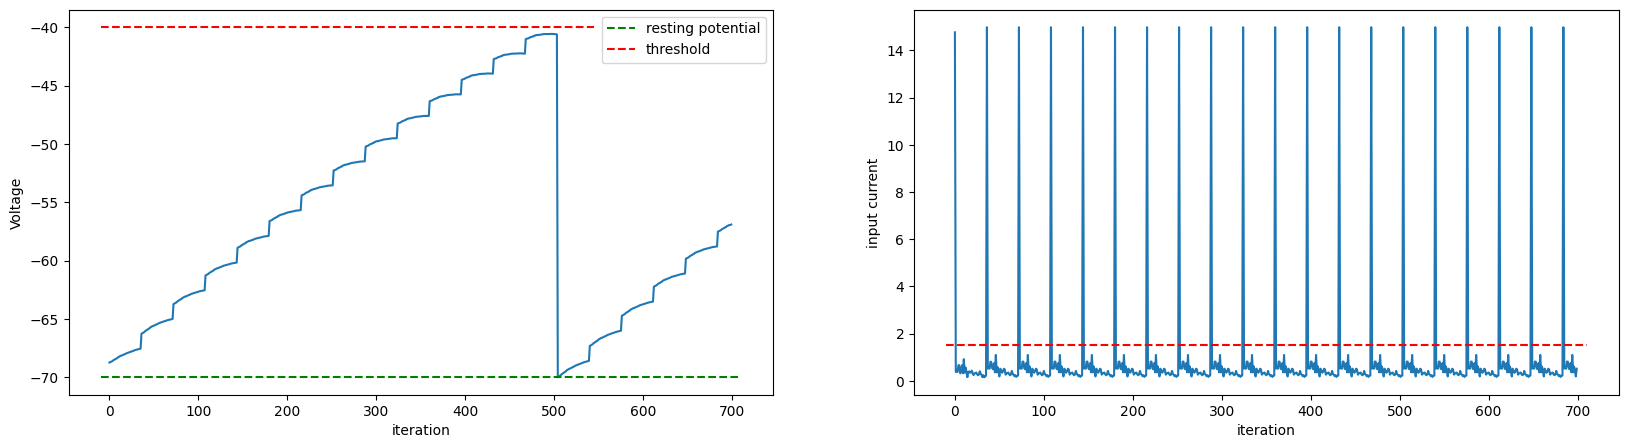

In [3]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng2["v", 0])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=545,
           linestyles='--', color='r', label='threshold')

plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()
# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng2["I", 0])
plt.hlines(y=1.5, xmin=-10, xmax=710,
           linestyles='--', color='r')
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

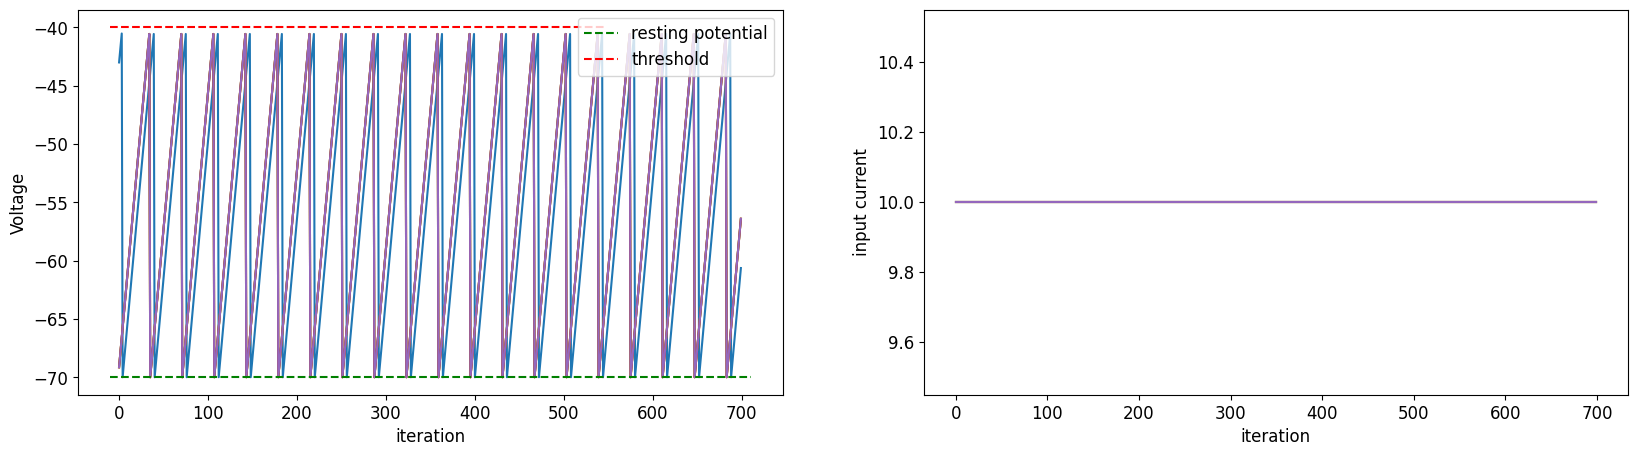

In [51]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :5])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=545,
           linestyles='--', color='r', label='threshold')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :5])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

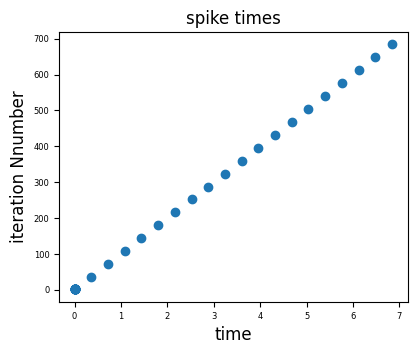

In [52]:
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(4.5, 3.5))
plt.scatter(ng1['spike'][0][ng1['spike', 0][:, 1] == 1] * 0.01,
            ng1['spike'][0][ng1['spike', 0][:, 1] == 1])
plt.xlabel('time', fontsize=12)
plt.ylabel('iteration Nnumber', fontsize=12)
plt.title('spike times', fontsize=12)
plt.show()

#### ELIF


In [29]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=20)

neuron_model = ELIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-45,
    R=100,
    delta_t=1,
    v_init_mode="normal(-50, 14)",
)

ng1 = NeuronGroup(
    size=10,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

current2 = ConstantCurrent(value=0)

ng2 = NeuronGroup(
    size=1,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(500)

Network['NET', 'Network'](Neurons: tensor(11)|2 groups, Synapses: tensor(10)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](10){2:ConstantCurrent(value=20,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-50, 14),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](1){2:ConstantCurrent(value=0,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-50, 14),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotat

171.27490043640137

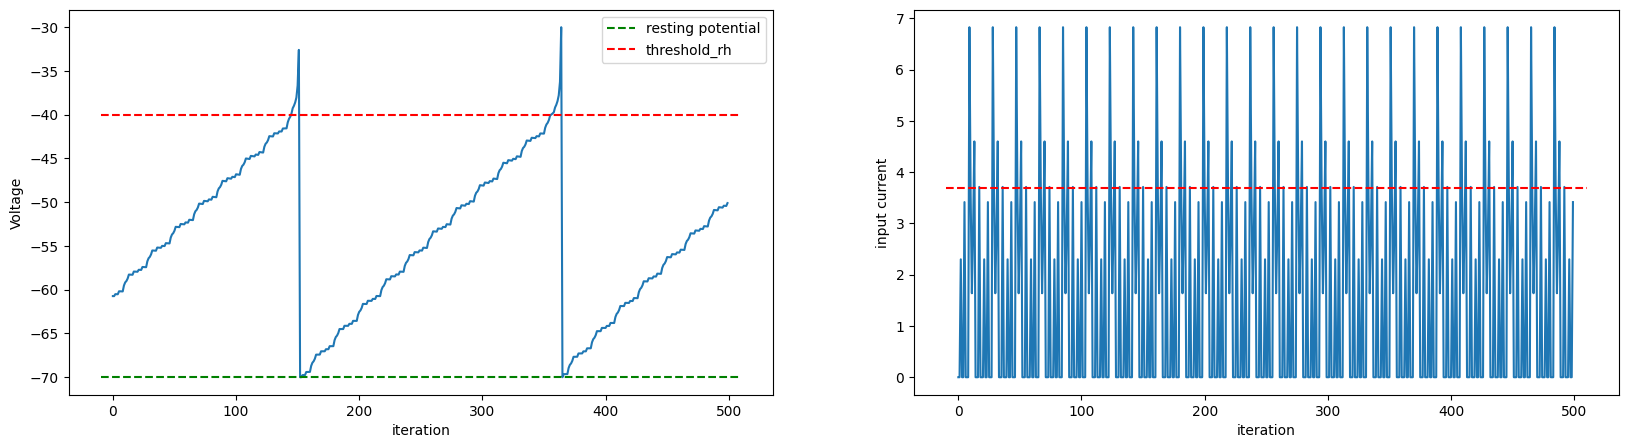

In [32]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng2["v", 0])
plt.hlines(y=-70, xmin=-10, xmax=510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=510,
           linestyles='--', color='r', label='threshold_rh')

plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()
# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng2["I", 0])
plt.hlines(y=3.7, xmin=-10, xmax=510,
           linestyles='--', color='r')
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

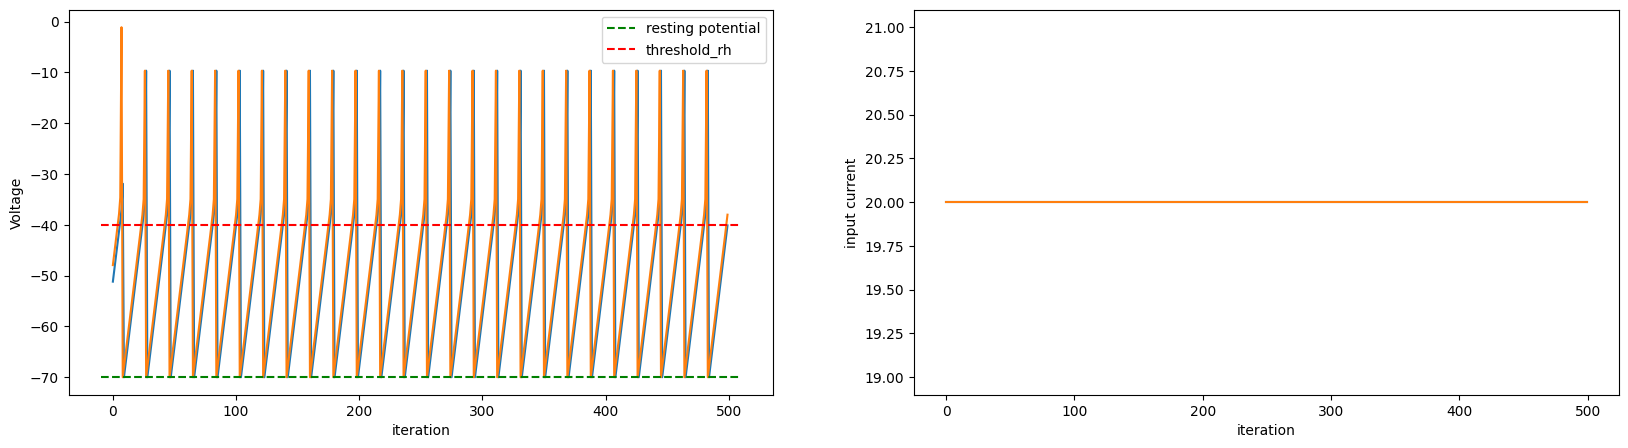

In [31]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :2])
plt.hlines(y=-70, xmin=-10, xmax=510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=510,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :2])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

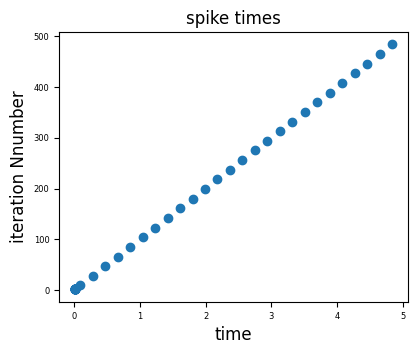

In [33]:
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(4.5, 3.5))
plt.scatter(ng1['spike'][0][ng1['spike', 0][:, 1] == 1] * 0.01,
            ng1['spike'][0][ng1['spike', 0][:, 1] == 1])
plt.xlabel('time', fontsize=12)
plt.ylabel('iteration Nnumber', fontsize=12)
plt.title('spike times', fontsize=12)
plt.show()

### Q2


#### Full Connectivity Schema Without Noise


In [82]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=15)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=100,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=20, std=5),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](100){2:ConstantCurrent(value=15,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
SynapseGroup['excitatory', 'SynapseGroup', 'syn', 'NG1 => NG1'](S100xD100){3:DDFSynapse(connection_mode=full,mean=20,std=5,),}
700xBatch: 1/1 (100%) 190.264ms


190.26422500610352

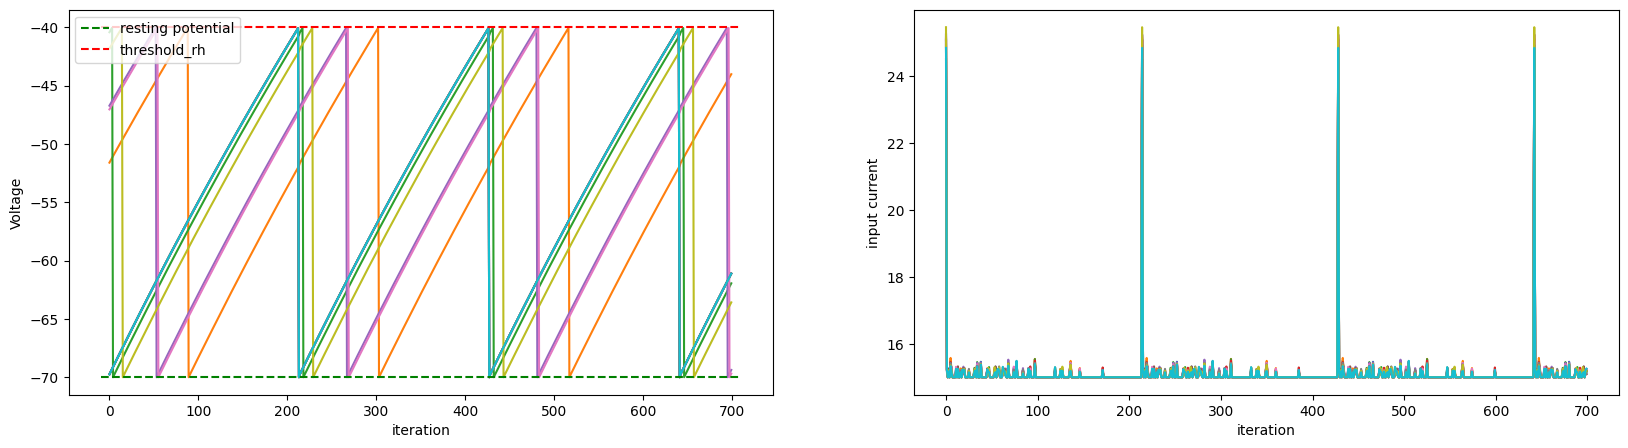

In [83]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :10])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=710,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :10])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

In [84]:
dic = {}
for neuron_id in range(1, 101):
    dic[neuron_id] = len(ng1['spike'][0][ng1['spike', 0][:, 1] == neuron_id])

In [85]:
unique_valuse = set(dic.values())
histogram_data_without_noise = {}
for key in unique_valuse:
    histogram_data_without_noise[key] = 0

for key, val in dic.items():
    histogram_data_without_noise[val] += 1

#### Full Connectivity Schema With Noise


In [86]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=15, with_noise=True,
                           noise_std=1, noise_level=0.9)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=100,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=20, std=5),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](100){2:ConstantCurrent(value=15,with_noise=True,noise_std=1,noise_level=0.9,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
SynapseGroup['excitatory', 'SynapseGroup', 'syn', 'NG1 => NG1'](S100xD100){3:DDFSynapse(connection_mode=full,mean=20,std=5,),}
700xBatch: 1/1 (100%) 200.546ms


200.5457878112793

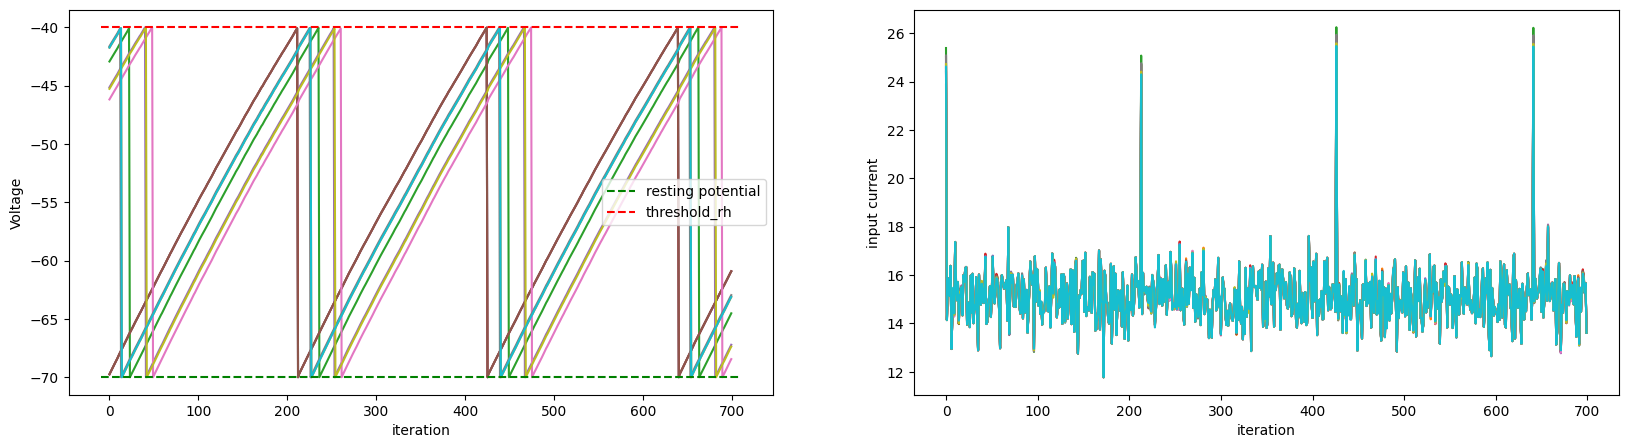

In [87]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :10])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=710,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :10])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

In [88]:
dic = {}
for neuron_id in range(1, 101):
    dic[neuron_id] = len(ng1['spike'][0][ng1['spike', 0][:, 1] == neuron_id])

In [89]:
unique_valuse = set(dic.values())
histogram_data_with_noise = {}
for key in unique_valuse:
    histogram_data_with_noise[key] = 0

for key, val in dic.items():
    histogram_data_with_noise[val] += 1

#### Compare


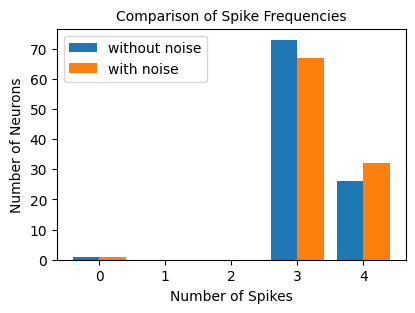

In [94]:
# Assuming both dictionaries have the same keys
keys = histogram_data_without_noise.keys()

plt.figure(figsize=(4.5, 3))

plt.bar([key - 0.2 for key in keys], histogram_data_without_noise.values(),
        width=0.4, align='center', label='without noise')
plt.bar([key + 0.2 for key in keys], histogram_data_with_noise.values(),
        width=0.4, align='center', label='with noise')

plt.xlabel('Number of Spikes')
plt.ylabel('Number of Neurons')
plt.title('Comparison of Spike Frequencies', fontsize=10)
plt.legend()

plt.show()

#### Fixed Probability Connectivity Without Noise


In [104]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=15)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=100,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=20, std=5),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](100){2:ConstantCurrent(value=15,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
SynapseGroup['excitatory', 'SynapseGroup', 'syn', 'NG1 => NG1'](S100xD100){3:DDFSynapse(connection_mode=fixed_probability,connection_prob=0.2,mean=20,std=5,),}
700xBatch: 1/1 (100%) 226.318ms


226.3178825378418

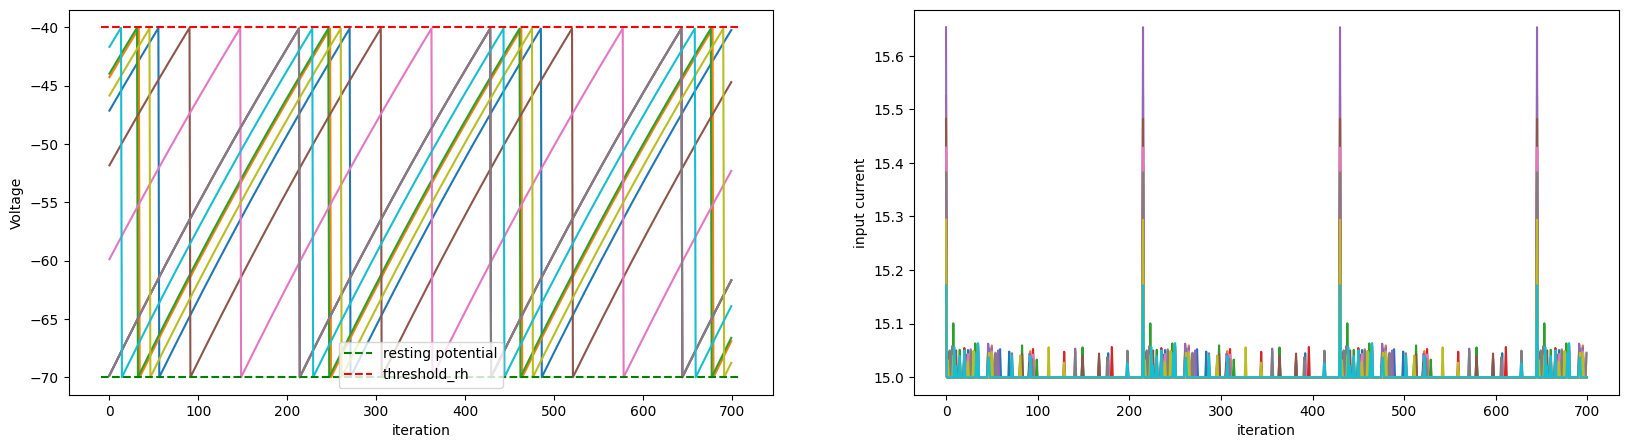

In [105]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :10])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=710,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :10])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

In [106]:
dic = {}
for neuron_id in range(1, 101):
    dic[neuron_id] = len(ng1['spike'][0][ng1['spike', 0][:, 1] == neuron_id])

In [107]:
unique_valuse = set(dic.values())
histogram_data_without_noise = {}
for key in unique_valuse:
    histogram_data_without_noise[key] = 0

for key, val in dic.items():
    histogram_data_without_noise[val] += 1

#### Fixed Probability Connectivity With Noise


In [108]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=15, with_noise=True,
                           noise_std=1, noise_level=0.9)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=100,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=20, std=5),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](100){2:ConstantCurrent(value=15,with_noise=True,noise_std=1,noise_level=0.9,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
SynapseGroup['excitatory', 'SynapseGroup', 'syn', 'NG1 => NG1'](S100xD100){3:DDFSynapse(connection_mode=fixed_probability,connection_prob=0.2,mean=20,std=5,),}
700xBatch: 1/1 (100%) 240.771ms


240.77105522155762

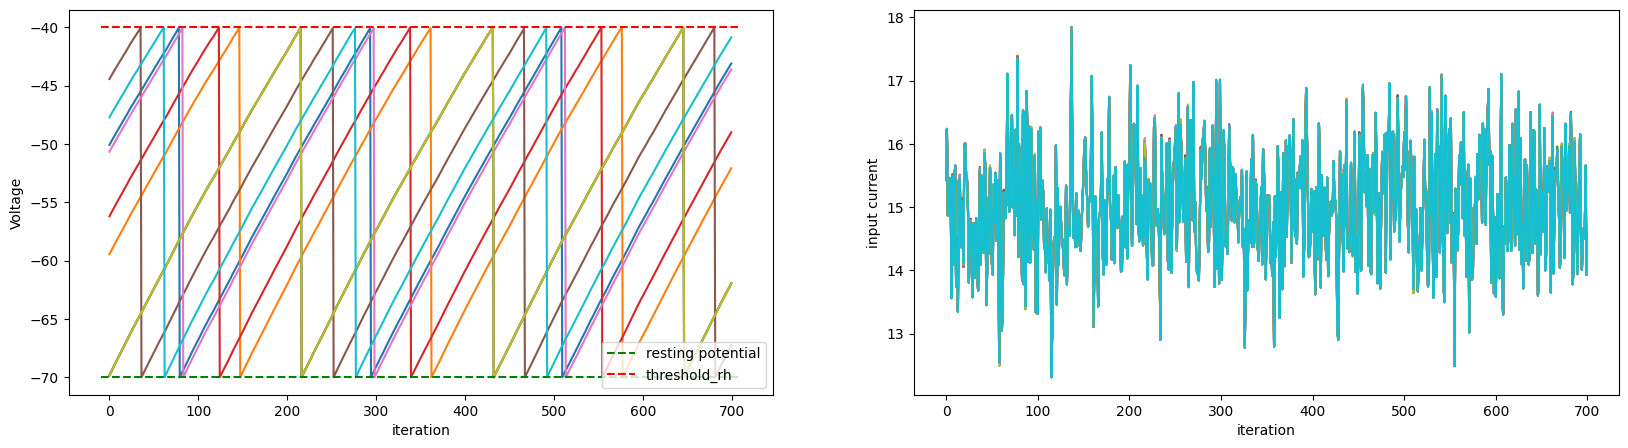

In [109]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :10])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=710,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :10])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

In [110]:
dic = {}
for neuron_id in range(1, 101):
    dic[neuron_id] = len(ng1['spike'][0][ng1['spike', 0][:, 1] == neuron_id])

In [111]:
unique_valuse = set(dic.values())
histogram_data_with_noise = {}
for key in unique_valuse:
    histogram_data_with_noise[key] = 0

for key, val in dic.items():
    histogram_data_with_noise[val] += 1

#### Compare


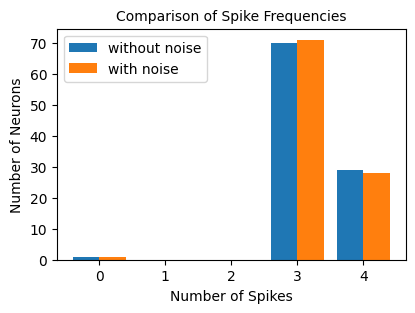

In [112]:
# Assuming both dictionaries have the same keys
keys = histogram_data_without_noise.keys()

plt.figure(figsize=(4.5, 3))

plt.bar([key - 0.2 for key in keys], histogram_data_without_noise.values(),
        width=0.4, align='center', label='without noise')
plt.bar([key + 0.2 for key in keys], histogram_data_with_noise.values(),
        width=0.4, align='center', label='with noise')

plt.xlabel('Number of Spikes')
plt.ylabel('Number of Neurons')
plt.title('Comparison of Spike Frequencies', fontsize=10)
plt.legend()

plt.show()

#### Fixed Count Connectivity Without Noise


In [113]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=15)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=100,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=20, mean=20, std=5),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](100){2:ConstantCurrent(value=15,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
SynapseGroup['excitatory', 'SynapseGroup', 'syn', 'NG1 => NG1'](S100xD100){3:DDFSynapse(connection_mode=fixed_count,connection_count=20,mean=20,std=5,),}
700xBatch: 1/1 (100%) 237.947ms


237.9467487335205

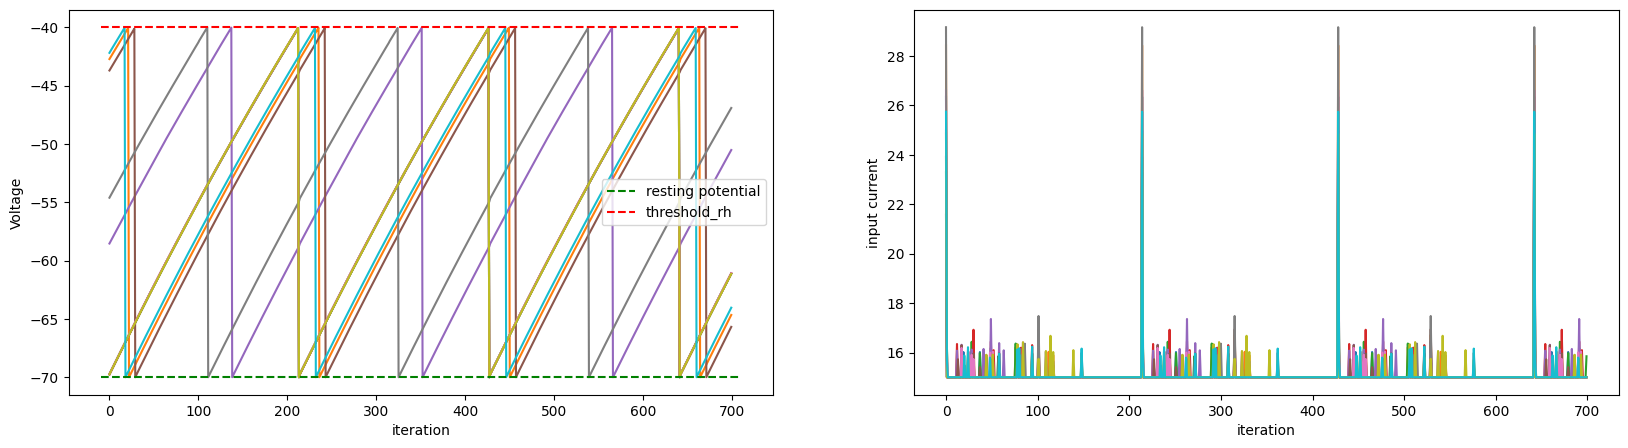

In [114]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :10])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=710,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :10])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

In [115]:
dic = {}
for neuron_id in range(1, 101):
    dic[neuron_id] = len(ng1['spike'][0][ng1['spike', 0][:, 1] == neuron_id])

In [116]:
unique_valuse = set(dic.values())
histogram_data_without_noise = {}
for key in unique_valuse:
    histogram_data_without_noise[key] = 0

for key, val in dic.items():
    histogram_data_without_noise[val] += 1

#### Fixed Count Conncetivity With Noise


In [117]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=15, with_noise=True,
                           noise_std=1, noise_level=0.9)

neuron_model = LIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=-40,
    R=10,
    v_init_mode="normal(-40, 10)",
)

ng1 = NeuronGroup(
    size=100,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=20, mean=20, std=5),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(700)

Network['NET', 'Network'](Neurons: tensor(100)|1 groups, Synapses: tensor(10000)|1 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](100){2:ConstantCurrent(value=15,with_noise=True,noise_std=1,noise_level=0.9,)5:LIF(tau=10,u_rest=-65,u_reset=-70,threshold=-40,R=10,v_init_mode=normal(-40, 10),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
SynapseGroup['excitatory', 'SynapseGroup', 'syn', 'NG1 => NG1'](S100xD100){3:DDFSynapse(connection_mode=fixed_count,connection_count=20,mean=20,std=5,),}
700xBatch: 1/1 (100%) 280.645ms


280.64513206481934

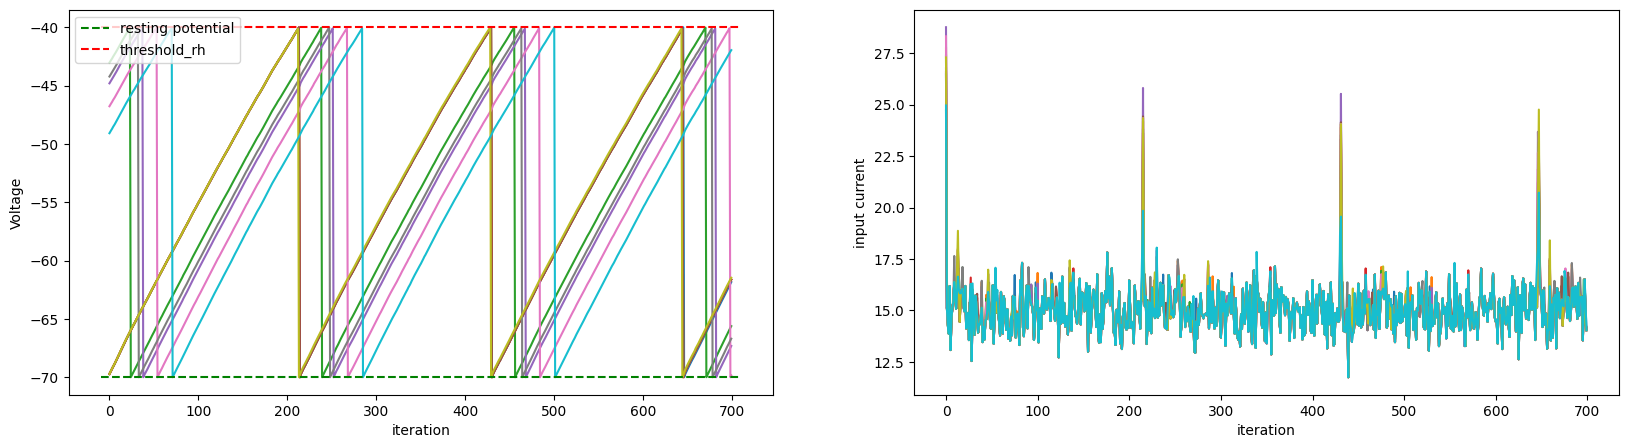

In [118]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :10])
plt.hlines(y=-70, xmin=-10, xmax=710,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=710,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :10])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

In [119]:
dic = {}
for neuron_id in range(1, 101):
    dic[neuron_id] = len(ng1['spike'][0][ng1['spike', 0][:, 1] == neuron_id])

In [120]:
unique_valuse = set(dic.values())
histogram_data_with_noise = {}
for key in unique_valuse:
    histogram_data_with_noise[key] = 0

for key, val in dic.items():
    histogram_data_with_noise[val] += 1

#### Compare


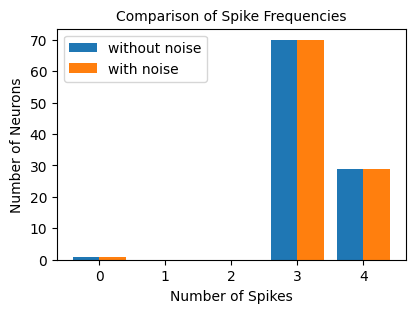

In [121]:
# Assuming both dictionaries have the same keys
keys = histogram_data_without_noise.keys()

plt.figure(figsize=(4.5, 3))

plt.bar([key - 0.2 for key in keys], histogram_data_without_noise.values(),
        width=0.4, align='center', label='without noise')
plt.bar([key + 0.2 for key in keys], histogram_data_with_noise.values(),
        width=0.4, align='center', label='with noise')

plt.xlabel('Number of Spikes')
plt.ylabel('Number of Neurons')
plt.title('Comparison of Spike Frequencies', fontsize=10)
plt.legend()

plt.show()

### Q3


#### Full Connectivity


In [49]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=1.5, with_noise=True,
                           noise_std=2, noise_level=1)

neuron_model = ELIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-45,
    R=100,
    delta_t=1,
    v_init_mode="normal(-40, 8)",
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=200,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='inhibitory')

net.initialize()
net.simulate_iterations(1500)

Network['NET', 'Network'](Neurons: tensor(1000)|2 groups, Synapses: tensor(320000)|2 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=1.5,with_noise=True,noise_std=2,noise_level=1,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-40, 8),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](200){2:ConstantCurrent(value=1.5,with_noise=True,noise_std=2,noise_level=1,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-40, 8),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_re

5092.850923538208

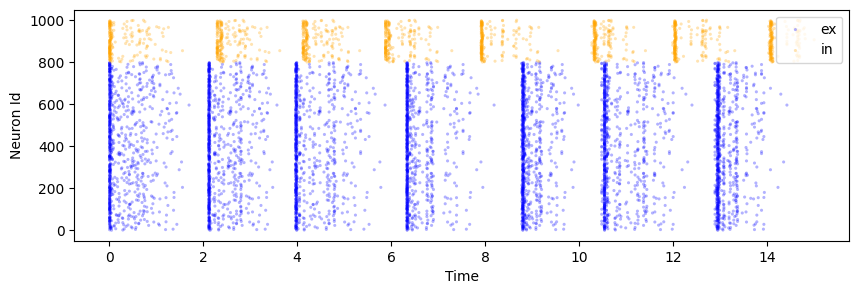

In [50]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=20, c='blue', label='ex',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=20, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right")
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()

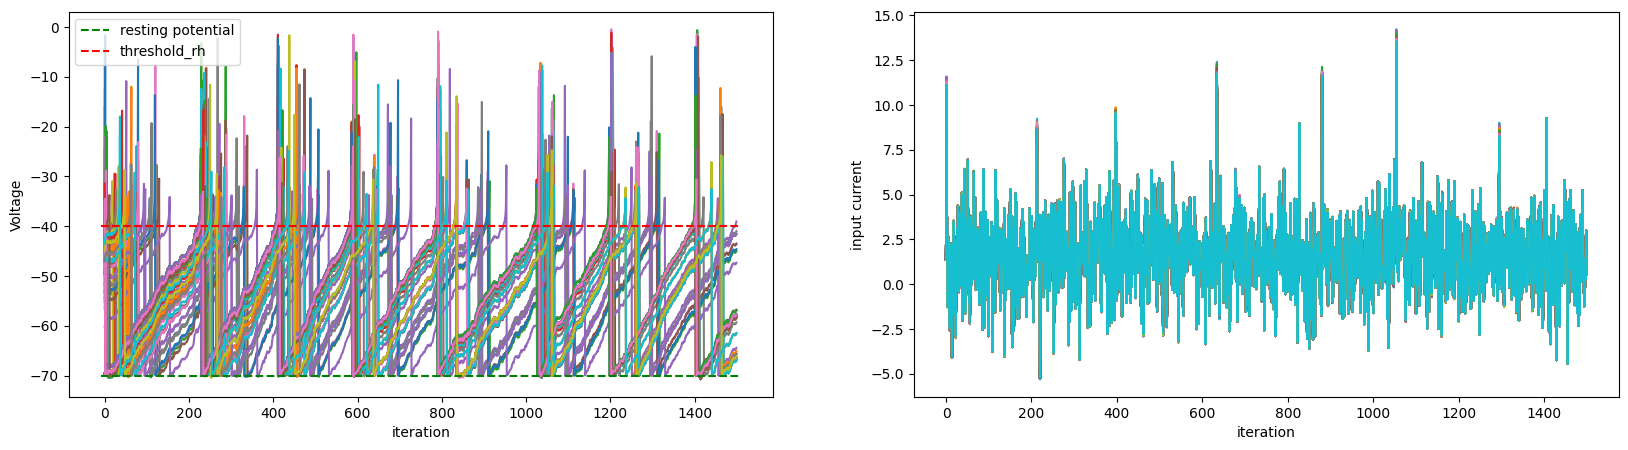

In [53]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng2["v", 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1510,
           linestyles='--', color='r', label='threshold_rh')

plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()
# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng2["I", 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

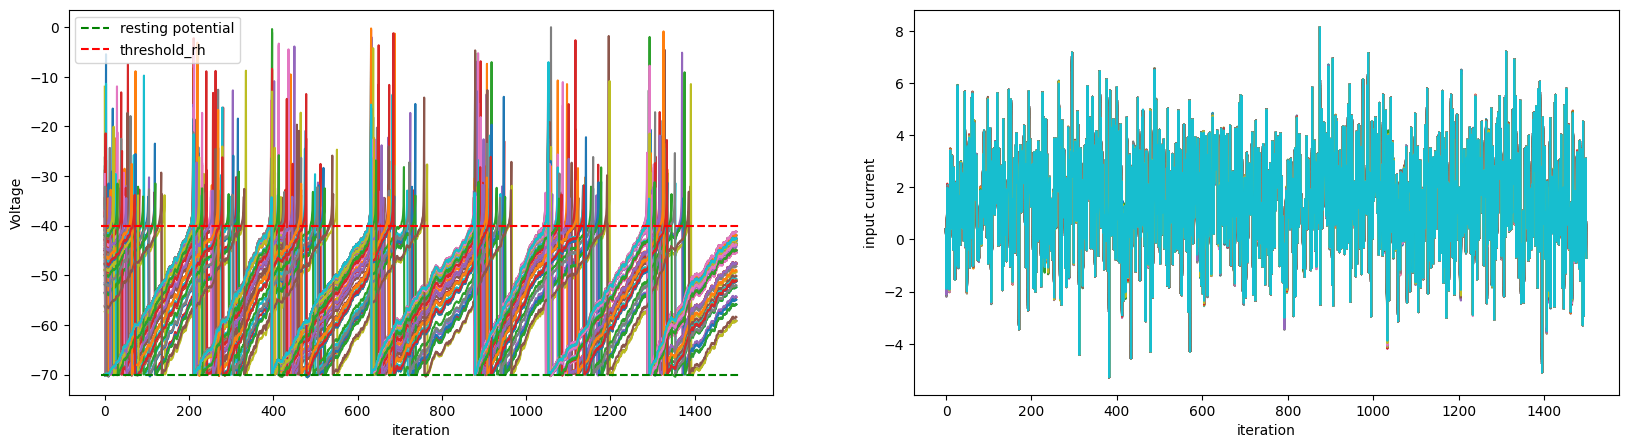

In [54]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1510,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

#### Fixed Probability Connectivity


In [2]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=1.5, with_noise=True,
                           noise_std=2, noise_level=1)

neuron_model = ELIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-45,
    R=100,
    delta_t=1,
    v_init_mode="normal(-40, 8)",
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=200,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='inhibitory')

net.initialize()
net.simulate_iterations(1500)

Network['NET', 'Network'](Neurons: tensor(1000)|2 groups, Synapses: tensor(320000)|2 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=1.5,with_noise=True,noise_std=2,noise_level=1,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-40, 8),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](200){2:ConstantCurrent(value=1.5,with_noise=True,noise_std=2,noise_level=1,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-40, 8),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_re

5174.647092819214

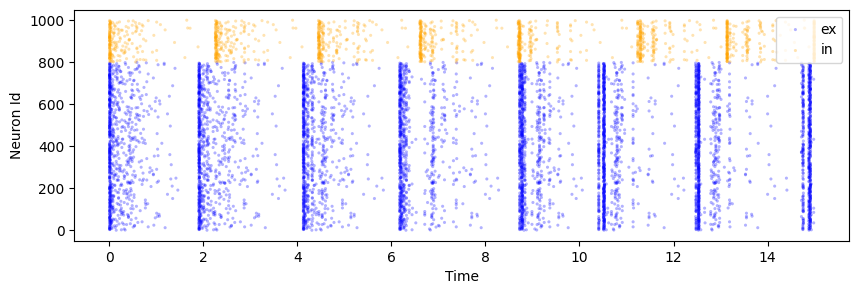

In [3]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=20, c='blue', label='ex',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=20, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right")
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()

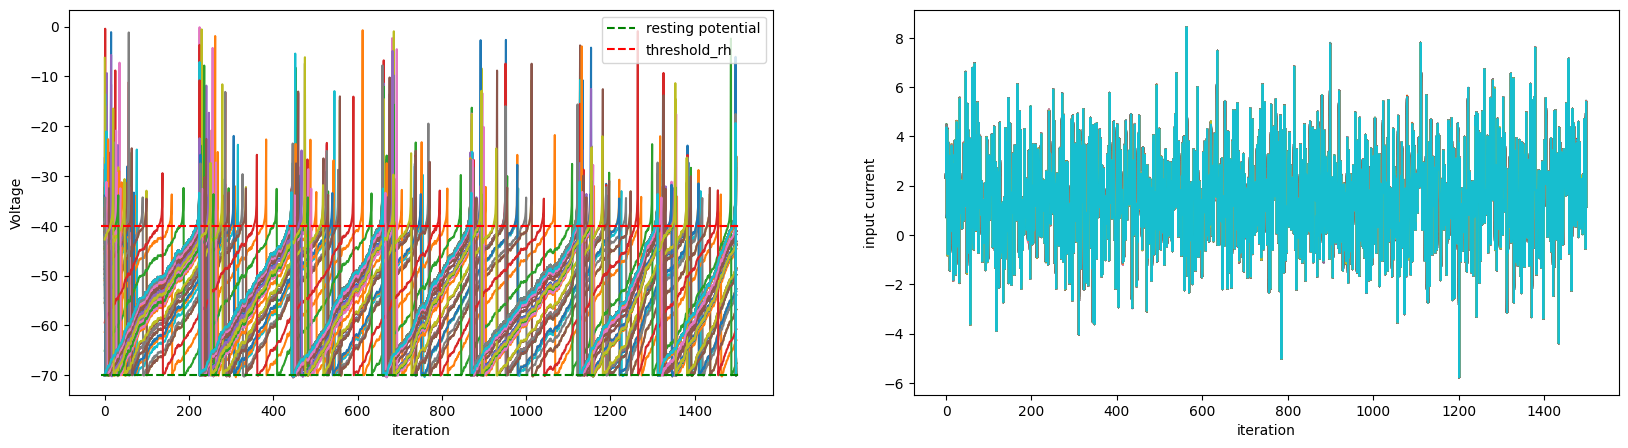

In [4]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng2["v", 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1510,
           linestyles='--', color='r', label='threshold_rh')

plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()
# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng2["I", 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

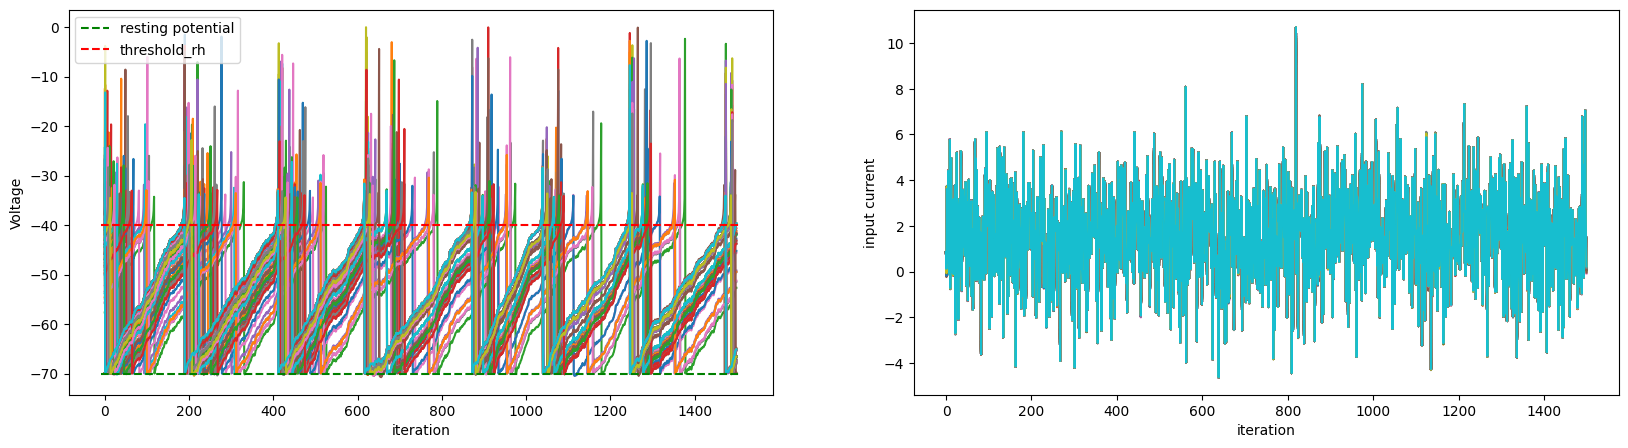

In [5]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1510,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

#### Fixed Number of Connections


In [6]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=1.5, with_noise=True,
                           noise_std=2, noise_level=1)

neuron_model = ELIF(
    tau=10,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-45,
    R=100,
    delta_t=1,
    v_init_mode="normal(-40, 8)",
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=200,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=100, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=100, mean=50, std=10),
}, tag='inhibitory')

net.initialize()
net.simulate_iterations(1500)

Network['NET', 'Network'](Neurons: tensor(1000)|2 groups, Synapses: tensor(320000)|2 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=1.5,with_noise=True,noise_std=2,noise_level=1,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-40, 8),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](200){2:ConstantCurrent(value=1.5,with_noise=True,noise_std=2,noise_level=1,)5:ELIF(tau=10,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-45,R=100,delta_t=1,v_init_mode=normal(-40, 8),)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_re

5375.810861587524

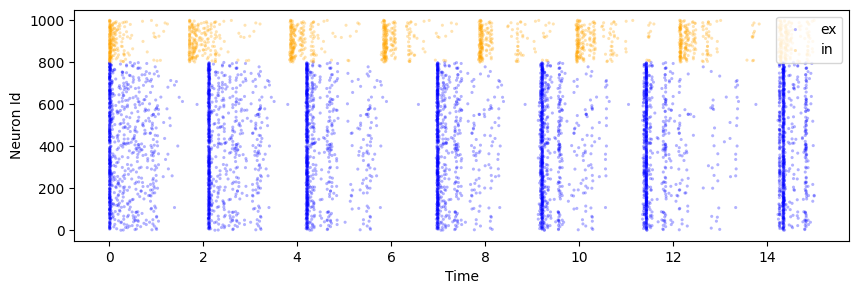

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=20, c='blue', label='ex',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=20, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right")
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()

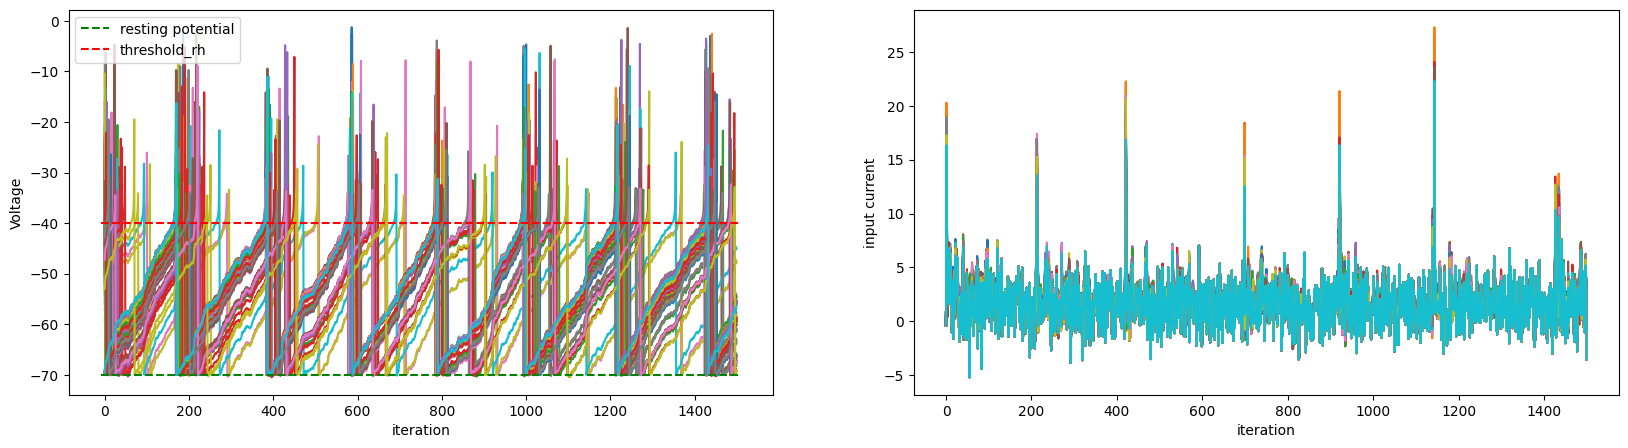

In [8]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng2["v", 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1510,
           linestyles='--', color='r', label='threshold_rh')

plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()
# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng2["I", 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

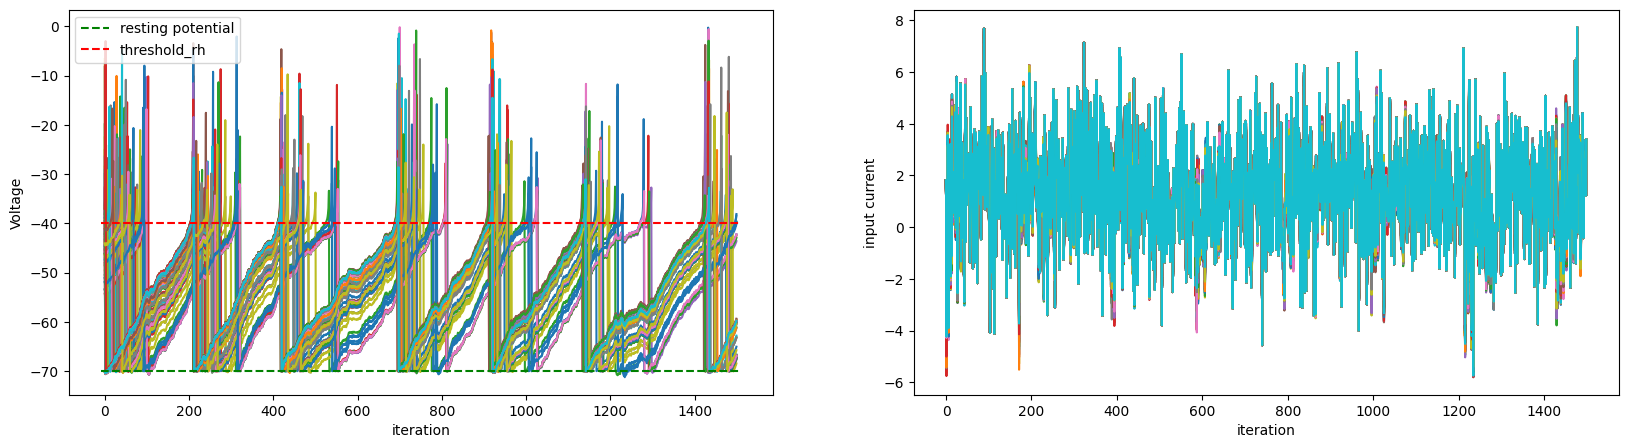

In [9]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1510,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1510,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

### Q4


#### Full Connectivity


In [56]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=100, with_noise=True,
                           noise_std=2, noise_level=1)

current2 = ConstantCurrent(value=300, with_noise=True,
                           noise_std=2, noise_level=1)

current3 = ConstantCurrent(value=0)

neuron_model = AELIF(
    tau=40,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-35,
    R=5,
    delta_t=1,
    v_init_mode="normal(-40, 14)",
    w_init_mode="normal(5, 10)",
    a_k=5,
    b_k=5,
    tau_k=10
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

ng3 = NeuronGroup(
    size=200,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG3",
)


SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng1, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng2, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(1200)

Network['NET', 'Network'](Neurons: tensor(1800)|3 groups, Synapses: tensor(3240000)|9 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=100,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=300,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8

8476.36103630066

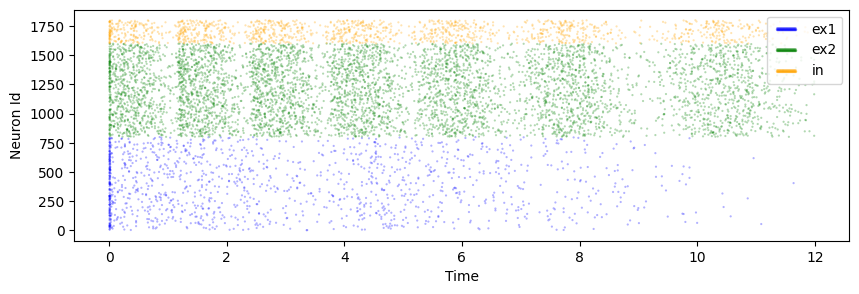

In [57]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=10, c='blue', label='ex1',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=10, c='green', label='ex2',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng3['spike'][0][:, 0] * 0.01), list(ng3['spike'][0][:, 1] + 1602)
ax.scatter(x, y, s=10, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right", scatterpoints=100)
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()

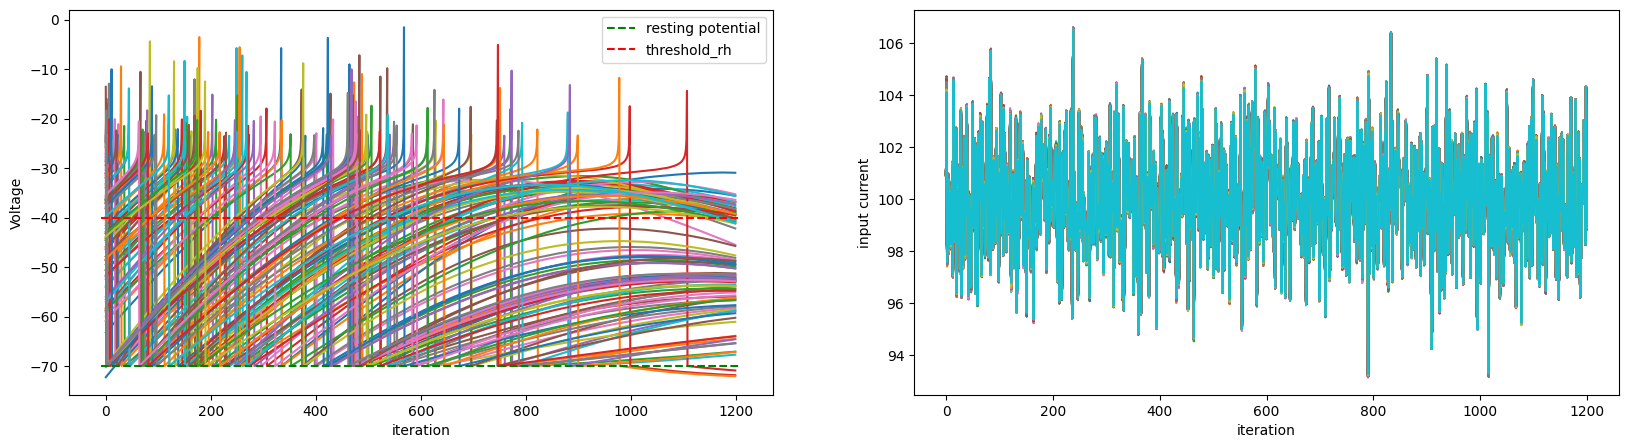

In [60]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng1['v', 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1210,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1210,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng1['I', 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

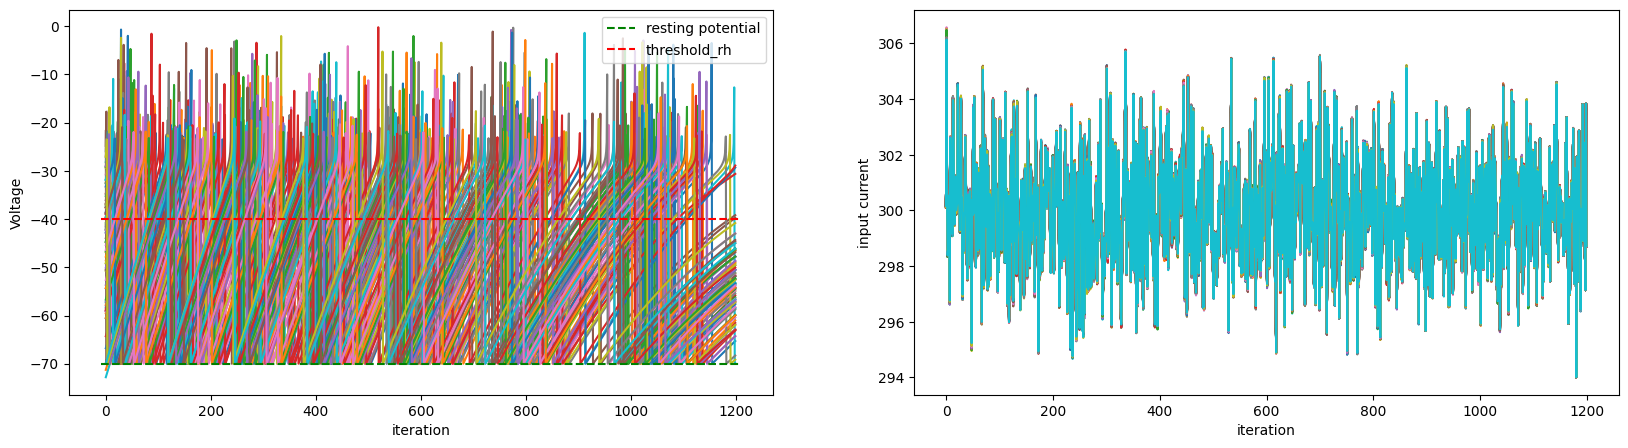

In [61]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng2['v', 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1210,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1210,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng2['I', 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

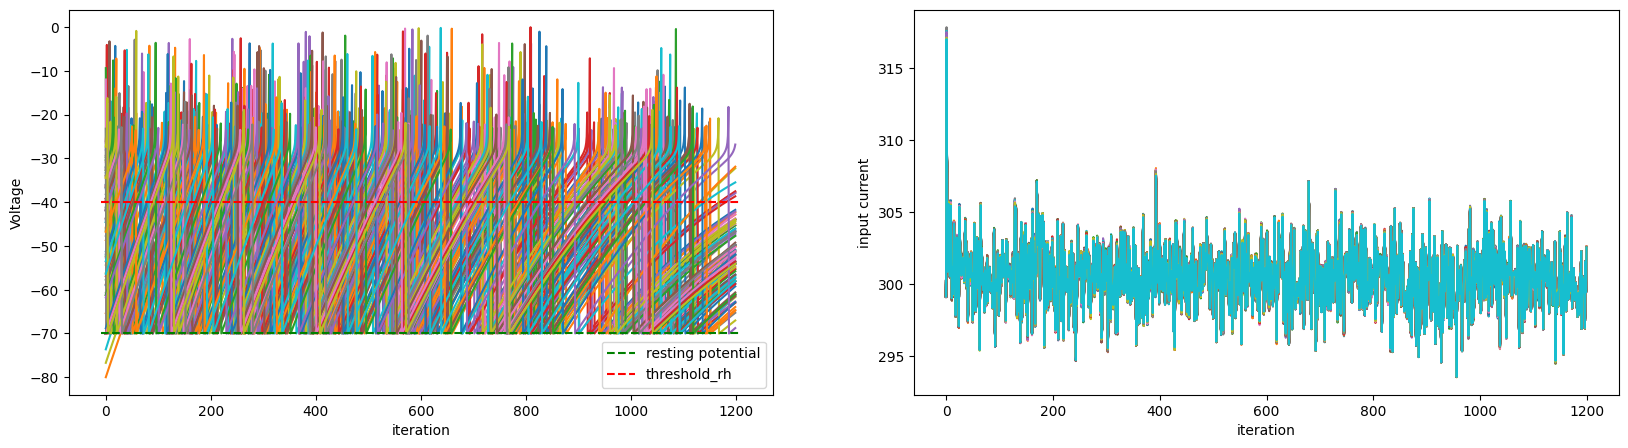

In [62]:
# plot 1:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(ng3['v', 0][:, :100])
plt.hlines(y=-70, xmin=-10, xmax=1210,
           linestyles='--', color='g', label='resting potential')
plt.hlines(y=-40, xmin=-10, xmax=1210,
           linestyles='--', color='r', label='threshold_rh')
plt.xlabel('iteration')
plt.ylabel('Voltage')
plt.legend()

# plot 2:
plt.subplot(1, 2, 2)
plt.plot(ng3['I', 0][:, :100])
plt.xlabel('iteration')
plt.ylabel('input current')

plt.show()

#### Different Size


In [65]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=100, with_noise=True,
                           noise_std=2, noise_level=1)

current2 = ConstantCurrent(value=300, with_noise=True,
                           noise_std=2, noise_level=1)

current3 = ConstantCurrent(value=0)

neuron_model = AELIF(
    tau=40,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-35,
    R=5,
    delta_t=1,
    v_init_mode="normal(-40, 14)",
    w_init_mode="normal(5, 10)",
    a_k=5,
    b_k=5,
    tau_k=10
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

ng3 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG3",
)


SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=30, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng1, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng2, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='full', mean=50, std=10),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(1200)

Network['NET', 'Network'](Neurons: tensor(2400)|3 groups, Synapses: tensor(5760000)|9 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=100,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=300,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8

10014.971017837524

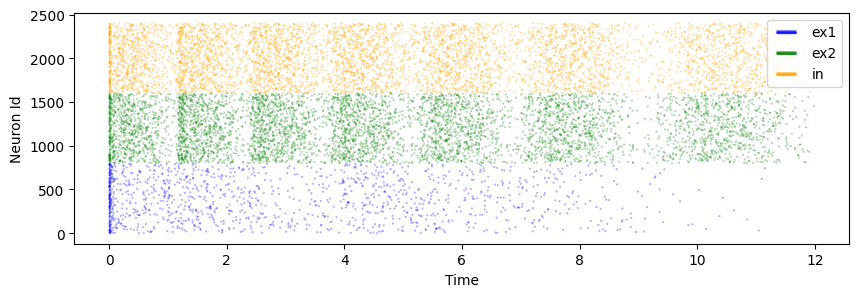

In [66]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=10, c='blue', label='ex1',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=10, c='green', label='ex2',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng3['spike'][0][:, 0] * 0.01), list(ng3['spike'][0][:, 1] + 1602)
ax.scatter(x, y, s=10, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right", scatterpoints=100)
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()

#### Fixed probability Connectivity


In [67]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=100, with_noise=True,
                           noise_std=2, noise_level=1)

current2 = ConstantCurrent(value=300, with_noise=True,
                           noise_std=2, noise_level=1)

current3 = ConstantCurrent(value=0)

neuron_model = AELIF(
    tau=40,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-35,
    R=5,
    delta_t=1,
    v_init_mode="normal(-40, 14)",
    w_init_mode="normal(5, 10)",
    a_k=5,
    b_k=5,
    tau_k=10
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

ng3 = NeuronGroup(
    size=200,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG3",
)


SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng1, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng2, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='fixed_probability', connection_prob=0.2, mean=50, std=10),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(1200)

Network['NET', 'Network'](Neurons: tensor(1800)|3 groups, Synapses: tensor(3240000)|9 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=100,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=300,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8

7974.448919296265

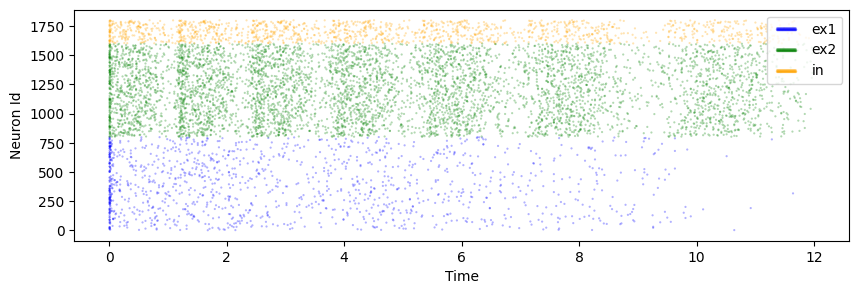

In [68]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=10, c='blue', label='ex1',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=10, c='green', label='ex2',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng3['spike'][0][:, 0] * 0.01), list(ng3['spike'][0][:, 1] + 1602)
ax.scatter(x, y, s=10, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right", scatterpoints=100)
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()

#### Fixed Count Connectivity


In [71]:
net = Network(behavior={1: TimeResolution(dt=0.01)},
              dtype=torch.float64, tag='NET')

current1 = ConstantCurrent(value=100, with_noise=True,
                           noise_std=2, noise_level=1)

current2 = ConstantCurrent(value=300, with_noise=True,
                           noise_std=2, noise_level=1)

current3 = ConstantCurrent(value=0)

neuron_model = AELIF(
    tau=40,
    u_rest=-65,
    u_reset=-70,
    threshold=0,
    threshold_rh=-35,
    R=5,
    delta_t=1,
    v_init_mode="normal(-40, 14)",
    w_init_mode="normal(5, 10)",
    a_k=5,
    b_k=5,
    tau_k=10
)

ng1 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current1,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG1",
)

ng2 = NeuronGroup(
    size=800,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG2",
)

ng3 = NeuronGroup(
    size=200,
    net=net,
    behavior={
        2: current2,
        5: neuron_model,
        8: Recorder(variables=["v", "I"], tag="ng_rec, ng_recorder"),
        9: Recorder(variables=['iter', 'spike_counts'], tag='iter_rec, spike_n_rec'),
        10: EventRecorder("spike", tag="ng_evrec"),
    },
    tag="NG3",
)


SynapseGroup(net=net, src=ng1, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng1, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng2, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng1, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng1, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

SynapseGroup(net=net, src=ng3, dst=ng2, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='inhibitory')

SynapseGroup(net=net, src=ng2, dst=ng3, behavior={
    3: DDFSynapse(connection_mode='fixed_count', connection_count=200, mean=50, std=10),
}, tag='excitatory')

net.initialize()
net.simulate_iterations(1200)

Network['NET', 'Network'](Neurons: tensor(1800)|3 groups, Synapses: tensor(3240000)|9 groups){1:TimeResolution(dt=0.01,)}
NeuronGroup['NG1', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=100,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8:Recorder(variables=['v', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_rec, ng_recorder,)9:Recorder(variables=['iter', 'spike_counts'],gap_width=0,max_length=None,auto_annotate=True,tag=iter_rec, spike_n_rec,)10:EventRecorder(variables=None,gap_width=0,max_length=None,auto_annotate=True,tag=ng_evrec,arg_0=spike,)}
NeuronGroup['NG2', 'NeuronGroup', 'ng'](800){2:ConstantCurrent(value=300,with_noise=True,noise_std=2,noise_level=1,)5:AELIF(tau=40,u_rest=-65,u_reset=-70,threshold=0,threshold_rh=-35,R=5,delta_t=1,v_init_mode=normal(-40, 14),w_init_mode=normal(5, 10),a_k=5,b_k=5,tau_k=10,)8

8995.515823364258

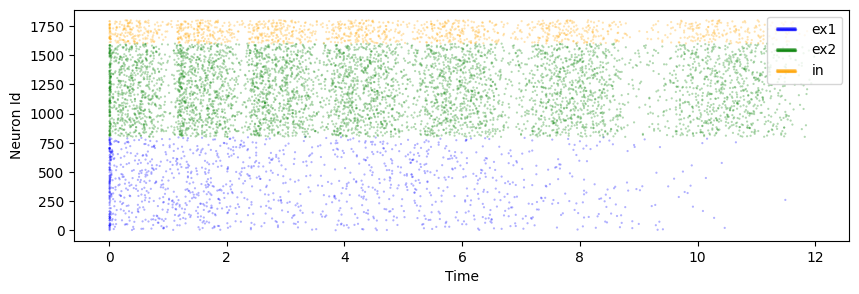

In [72]:
fig, ax = plt.subplots(figsize=(10, 3))

x, y = list(ng1['spike'][0][:, 0] * 0.01), list(ng1['spike'][0][:, 1])
ax.scatter(x, y, s=10, c='blue', label='ex1',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng2['spike'][0][:, 0] * 0.01), list(ng2['spike'][0][:, 1] + 801)
ax.scatter(x, y, s=10, c='green', label='ex2',
           alpha=0.3, edgecolors='none', marker='.')

x, y = list(ng3['spike'][0][:, 0] * 0.01), list(ng3['spike'][0][:, 1] + 1602)
ax.scatter(x, y, s=10, c='orange', label='in',
           alpha=0.3, edgecolors='none', marker='.')

ax.legend(loc="upper right", scatterpoints=100)
ax.set_xlabel('Time')
ax.set_ylabel('Neuron Id')

plt.show()